# Uploading the Data

In [1]:
import pandas as pd
df = pd.read_csv("fish.csv")
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

# Understanding the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


6 numeric 1 string data var. string data kategorize edilebilir..

In [3]:
df.describe(include="all")

Species       Weight     Length1     Length2     Length3      Height  \
count      159   159.000000  159.000000  159.000000  159.000000  159.000000   
unique       7          NaN         NaN         NaN         NaN         NaN   
top      Perch          NaN         NaN         NaN         NaN         NaN   
freq        56          NaN         NaN         NaN         NaN         NaN   
mean       NaN   398.326415   26.247170   28.415723   31.227044    8.970994   
std        NaN   357.978317    9.996441   10.716328   11.610246    4.286208   
min        NaN     0.000000    7.500000    8.400000    8.800000    1.728400   
25%        NaN   120.000000   19.050000   21.000000   23.150000    5.944800   
50%        NaN   273.000000   25.200000   27.300000   29.400000    7.786000   
75%        NaN   650.000000   32.700000   35.500000   39.650000   12.365900   
max        NaN  1650.000000   59.000000   63.400000   68.000000   18.957000   

             Width  
count   159.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      4.417486  
std       1.685804  
min       1.047600  
25%       3.385650  
50%       4.248500  
75%       5.584500  
max       8.142000

boş veri yok. Data temiz devam edebiliriz.

In [23]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [5]:
df.corr()

Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000

correlation: measure of linear relationship between variables.(it can be positive and negative relation (gradient))

# Visualizing 

In [6]:
import plotly.express as px

In [7]:
px.histogram(df,x='Species')  

In [8]:
px.histogram(df,x="Species",y="Weight")

These two histograms gives us a valuable info about weight per unit species.

In [9]:
import seaborn as sns

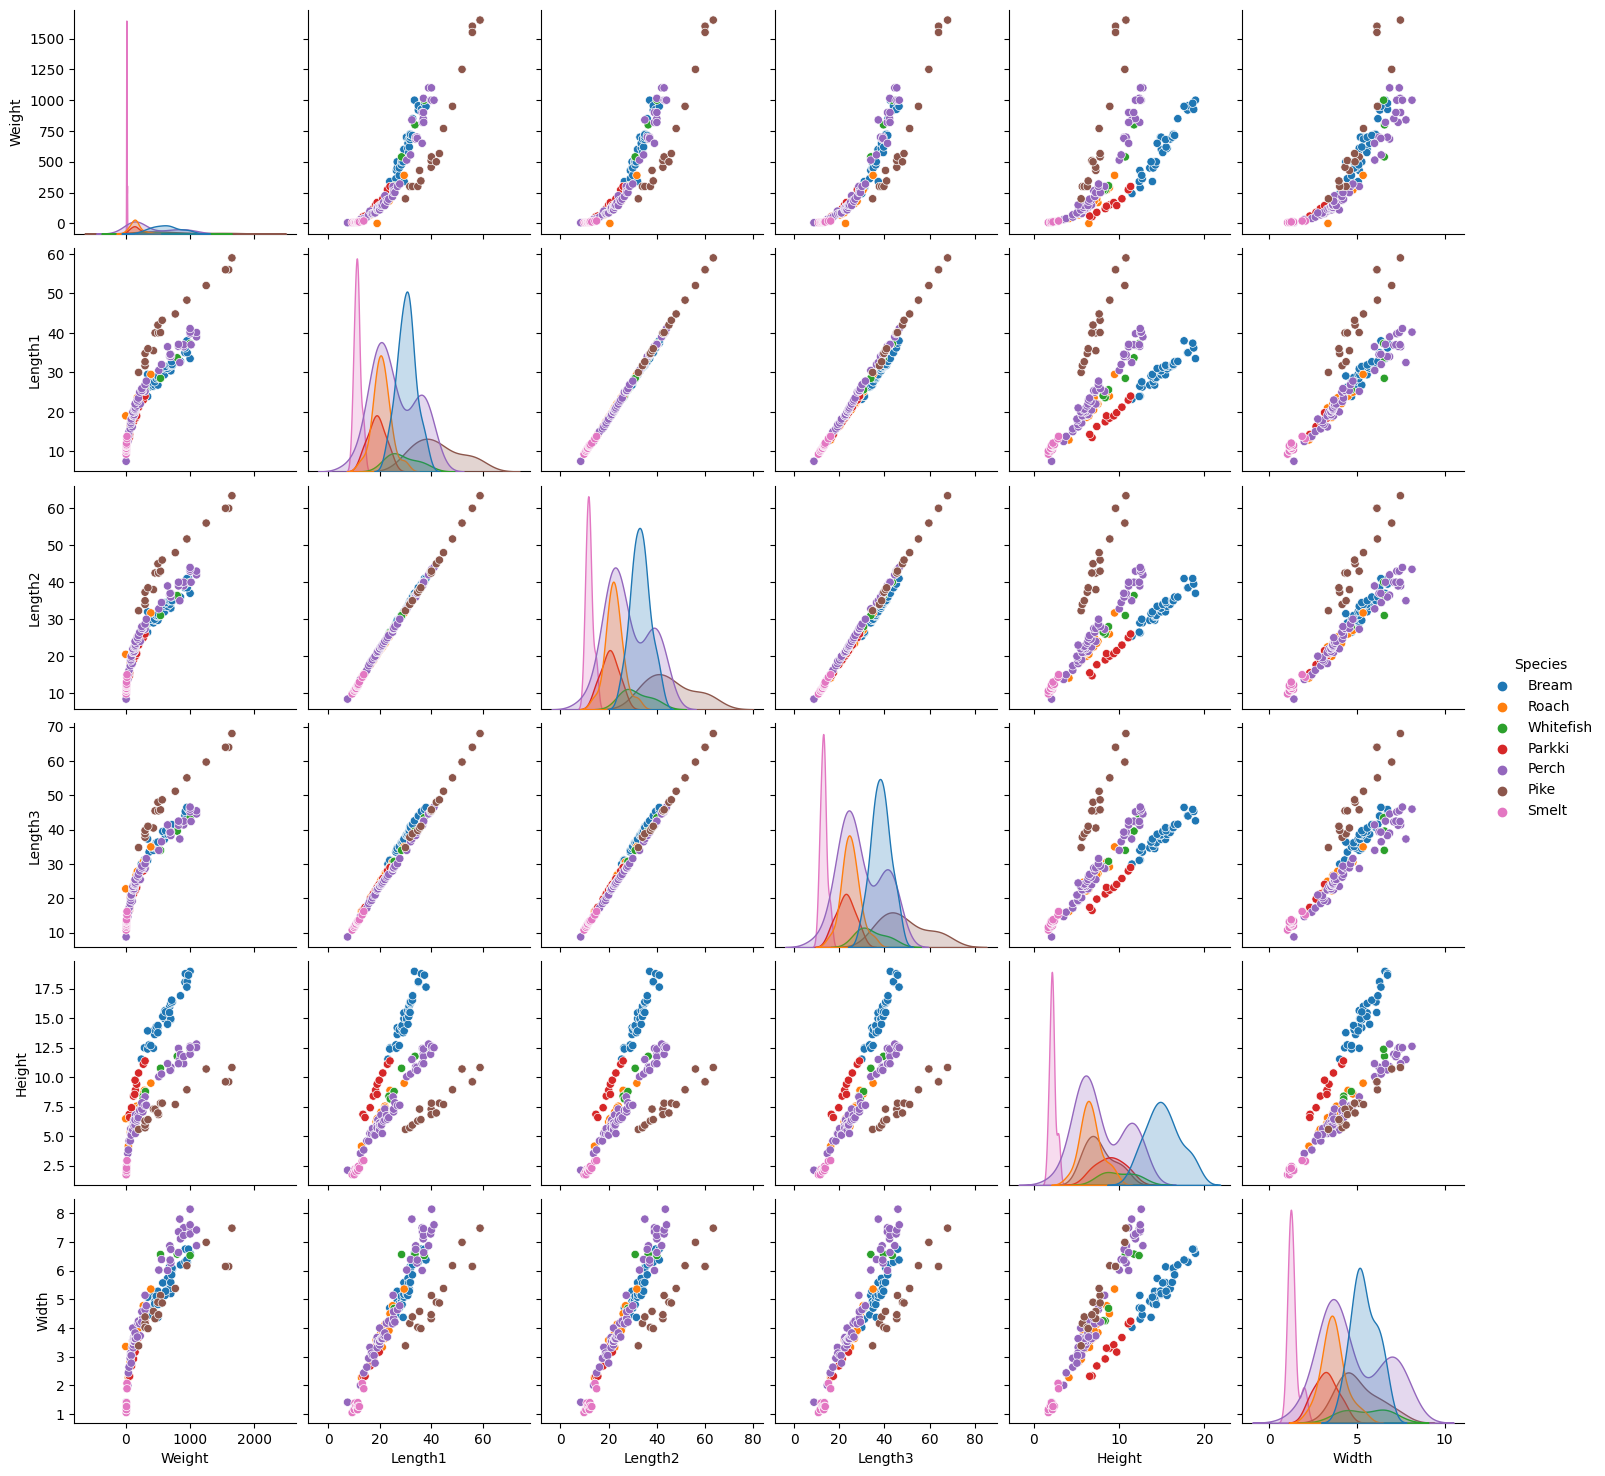

In [10]:
sns.pairplot(df,hue="Species")

<AxesSubplot:>

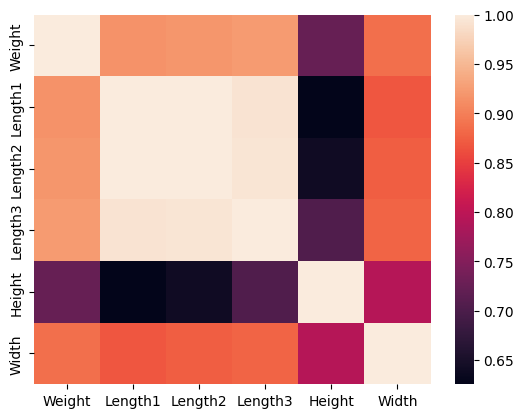

In [11]:
sns.heatmap(df.corr())

# Model Creation

1-string datayı çevir.
2-bütün datayı test,train ayır.
3-regression uygula
4-predict

In [12]:
# df = pd.get_dummies(df,columns=["Species"]) tek satırda
dummies = pd.get_dummies(df.Species)
dummies

Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
0        1       0      0     0      0      0          0
1        1       0      0     0      0      0          0
2        1       0      0     0      0      0          0
3        1       0      0     0      0      0          0
4        1       0      0     0      0      0          0
..     ...     ...    ...   ...    ...    ...        ...
154      0       0      0     0      0      1          0
155      0       0      0     0      0      1          0
156      0       0      0     0      0      1          0
157      0       0      0     0      0      1          0
158      0       0      0     0      0      1          0

[159 rows x 7 columns]

In [13]:
merged = pd.concat([df,dummies],axis="columns")
final = merged.drop(["Species","Bream"],axis="columns")
final

Weight  Length1  Length2  Length3   Height   Width  Parkki  Perch  Pike  \
0     242.0     23.2     25.4     30.0  11.5200  4.0200       0      0     0   
1     290.0     24.0     26.3     31.2  12.4800  4.3056       0      0     0   
2     340.0     23.9     26.5     31.1  12.3778  4.6961       0      0     0   
3     363.0     26.3     29.0     33.5  12.7300  4.4555       0      0     0   
4     430.0     26.5     29.0     34.0  12.4440  5.1340       0      0     0   
..      ...      ...      ...      ...      ...     ...     ...    ...   ...   
154    12.2     11.5     12.2     13.4   2.0904  1.3936       0      0     0   
155    13.4     11.7     12.4     13.5   2.4300  1.2690       0      0     0   
156    12.2     12.1     13.0     13.8   2.2770  1.2558       0      0     0   
157    19.7     13.2     14.3     15.2   2.8728  2.0672       0      0     0   
158    19.9     13.8     15.0     16.2   2.9322  1.8792       0      0     0   

     Roach  Smelt  Whitefish  
0        0      0          0  
1        0      0          0  
2        0      0          0  
3        0      0          0  
4        0      0          0  
..     ...    ...        ...  
154      0      1          0  
155      0      1          0  
156      0      1          0  
157      0      1          0  
158      0      1          0  

[159 rows x 12 columns]

In [14]:
x = final.drop(["Weight"],axis="columns")
y = final.Weight

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7,random_state=100)

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
reg.coef_

array([ -47.18152213,   69.96961503,   16.8657029 ,   -3.04390063,
         -7.50363061,  111.56356975,   56.94364044, -352.1982406 ,
         56.64835756,  350.54528607,   20.97329589])

In [18]:
reg.intercept_

-843.333789135551

In [19]:
score = reg.score(x_train,y_train)
score

0.9370458012311763

In [20]:
predictions = reg.predict(x_test)

In [21]:
pred_data = {"y_test":y_test,"y_pred":predictions}
pd.DataFrame(data=pred_data).head()

y_test       y_pred
45    160.0   197.036896
11    500.0   502.280944
127  1000.0  1044.043365
15    600.0   547.099293
7     390.0   470.086004

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print("R2 score: "+str(r2))

R2 score: 0.9209134300043168
